In [1]:
import pandas as pd

df = pd.read_csv('monthly_dataset.csv')

df.head()

,Year,Month,Date,Population (million),Temperature (celsius),CPI,GDP (million bahts),Peak Load (MW),Generation (GWh),Consumption (GWh)
0,2002,Jan,2002-Jan,63.25,26.45,70.23,480343.33,14552.5,8261.93,7326.80
1,2002,Feb,2002-Feb,63.21,26.49,70.23,480343.33,15260.8,8187.95,7359.06
2,2002,Mar,2002-Mar,63.17,26.52,70.23,480343.33,16485.3,9687.11,8471.25
3,2002,Apr,2002-Apr,63.13,26.55,70.23,470404.67,16681.1,9378.36,8461.08
4,2002,May,2002-May,63.09,26.58,70.07,470404.67,16293.1,9654.67,8730.29


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   252 non-null    int64  
 1   Month                  252 non-null    object 
 2   Date                   252 non-null    object 
 3   Population (million)   252 non-null    float64
 4   Temperature (celsius)  252 non-null    float64
 5   CPI                    252 non-null    float64
 6   GDP (million bahts)    252 non-null    float64
 7   Peak Load (MW)         252 non-null    float64
 8   Generation (GWh)       252 non-null    float64
 9   Consumption (GWh)      252 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 19.8+ KB


In [3]:
df = df.drop(['Year', 'Month', 'Date', 'Generation (GWh)', 'Consumption (GWh)'], axis=1)

df = df.sample(frac=1).reset_index(drop=True)

df.head()

,Population (million),Temperature (celsius),CPI,GDP (million bahts),Peak Load (MW)
0,66.16,26.65,100.78,841064.00,29692.1
1,63.66,27.05,85.03,635891.00,18602.9
2,63.57,26.79,85.50,624711.00,20957.4
3,63.20,26.68,71.50,503668.33,17271.8
4,63.17,26.52,70.23,480343.33,16485.3


In [4]:
X = df.drop('Peak Load (MW)', axis=1).values
y = df['Peak Load (MW)'].values

X.shape, y.shape

((252, 4), (252,))

In [5]:
train_len = 240

X_train = X[:train_len]
X_test = X[train_len:]

y_train = y[:train_len]
y_test = y[train_len:]

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((240, 4), (12, 4), (240,), (12,))

In [15]:
import tensorflow as tf

model = tf.keras.Sequential([
        tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1)])

# model.compile(loss='mean_squared_error', optimizer='Adam')
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=3000, validation_split=0.2)

Epoch 1/3000
6/6 [==============================] - 1s 35ms/step - loss: 556056128.0000 - mae: 23246.0918 - val_loss: 579657536.0000 - val_mae: 23792.5723
Epoch 2/3000
6/6 [==============================] - 0s 10ms/step - loss: 556050880.0000 - mae: 23245.9707 - val_loss: 579652608.0000 - val_mae: 23792.4629
Epoch 3/3000
6/6 [==============================] - 0s 10ms/step - loss: 556045312.0000 - mae: 23245.8496 - val_loss: 579647488.0000 - val_mae: 23792.3516
Epoch 4/3000
6/6 [==============================] - 0s 11ms/step - loss: 556039680.0000 - mae: 23245.7246 - val_loss: 579642112.0000 - val_mae: 23792.2324
Epoch 5/3000
6/6 [==============================] - 0s 10ms/step - loss: 556033472.0000 - mae: 23245.5801 - val_loss: 579636544.0000 - val_mae: 23792.1035
Epoch 6/3000
6/6 [==============================] - 0s 11ms/step - loss: 556026944.0000 - mae: 23245.4316 - val_loss: 579630400.0000 - val_mae: 23791.9688
Epoch 7/3000
6/6 [==============================] - 0s 10ms/step - los

In [16]:
import tensorflow as tf

tf.keras.models.save_model(model, 'ANN_tf_model')

INFO:tensorflow:Assets written to: ANN_tf_model\assets


INFO:tensorflow:Assets written to: ANN_tf_model\assets


In [17]:
model = tf.keras.models.load_model('ANN_tf_model')

In [18]:
test_loss = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)

1/1 [==============================] - 0s 105ms/step - loss: 1222872.2500 - mae: 923.9592
Test loss: [1222872.25, 923.9591674804688]


1/1 [==============================] - 0s 61ms/step


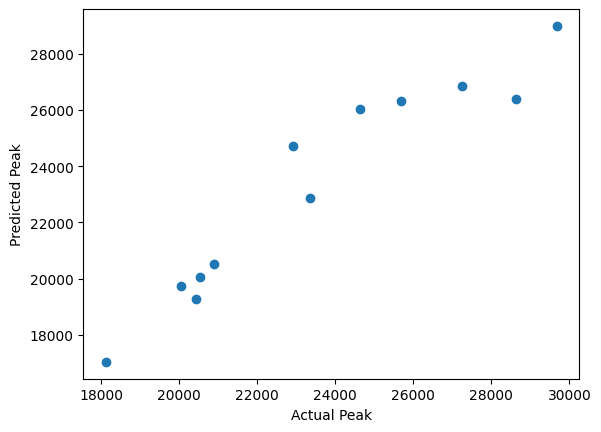

In [19]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Peak')
plt.ylabel('Predicted Peak')
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np
import math

def mape(test, pred):
    test, pred = np.array(test), np.array(pred)
    mape = np.mean(np.abs((test - pred) / test))
    return mape

MSE  = mean_squared_error(y_test, y_pred)
RMSE = math.sqrt(MSE)
MAE  = mean_absolute_error(y_test, y_pred)
MAPE = mape(y_test, y_pred)

MSE, RMSE, MAE, MAPE

(1222873.4890983521,
 1105.8361040852085,
 923.9594531249995,
 0.17863494055853135)